In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.api import SimpleExpSmoothing

In [2]:
dataa = pd.read_csv('time_series.csv')
dataa

,week,value
0,1,18
1,2,13
2,3,16
3,4,11
4,5,17
5,6,14


In [3]:
dataa.set_index('week', inplace=True)
valuess = dataa['value']
dataa

,value
week,
1,18
2,13
3,16
4,11
5,17
6,14


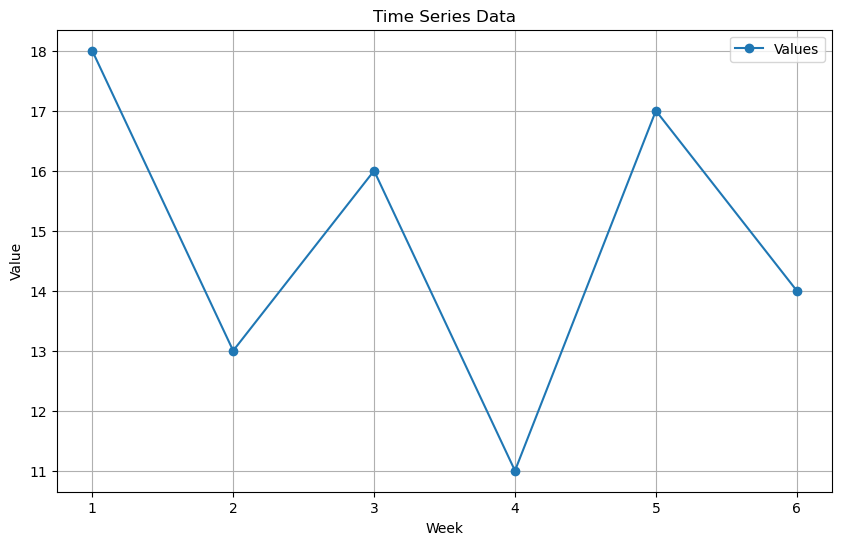

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(dataa.index, dataa['value'], marker='o', label='Values')
plt.title("Time Series Data")
plt.xlabel("Week")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
dataa['naive'] = valuess.shift(1)
naive_for_week_7 = valuess.iloc[-1]
naive_for_week_7

14

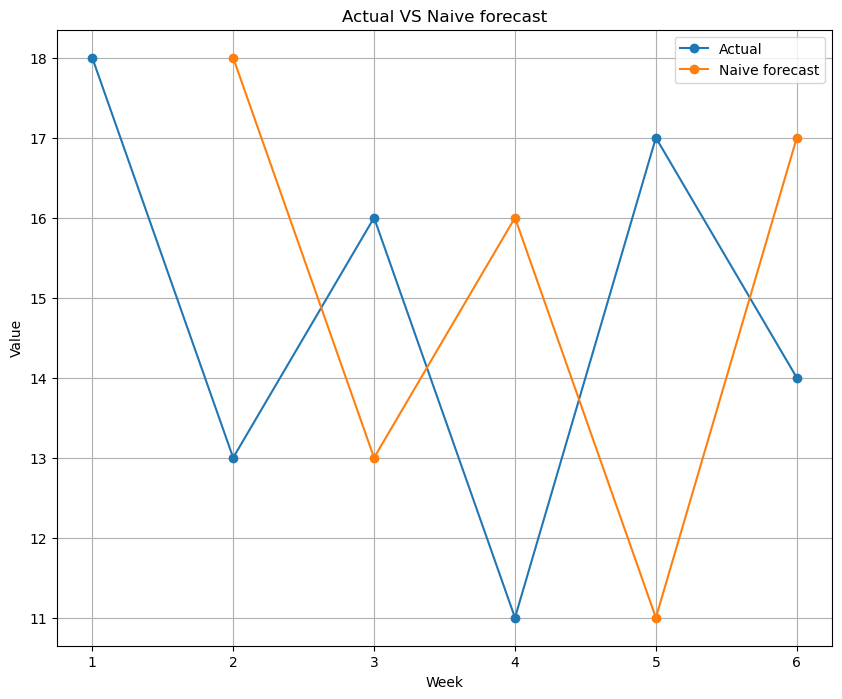

In [6]:
plt.figure(figsize=(10,8))
plt.plot(dataa.index, valuess, marker='o', label='Actual')
plt.plot(dataa.index, dataa['naive'], marker='o', label='Naive forecast')
plt.title("Actual VS Naive forecast")
plt.xlabel("Week")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
data_clean = dataa.dropna()
mse_naive = mean_squared_error(data_clean['value'], data_clean['naive'])
mse_naive

20.8

In [12]:
data_clean = dataa.dropna()
mae_naive = mean_absolute_error(data_clean['value'], data_clean['naive'])
mae_naive

4.4

In [14]:
data_clean = dataa.dropna()
mape_naive = mean_absolute_percentage_error(data_clean['value'], data_clean['naive'])
mape_naive*100

31.877754598342833

In [15]:
# moving average
dataa['SMA_3'] = valuess.rolling(window=3).mean()
SMA_for_week_7 = valuess.iloc[-3:].mean()
SMA_for_week_7

14.0

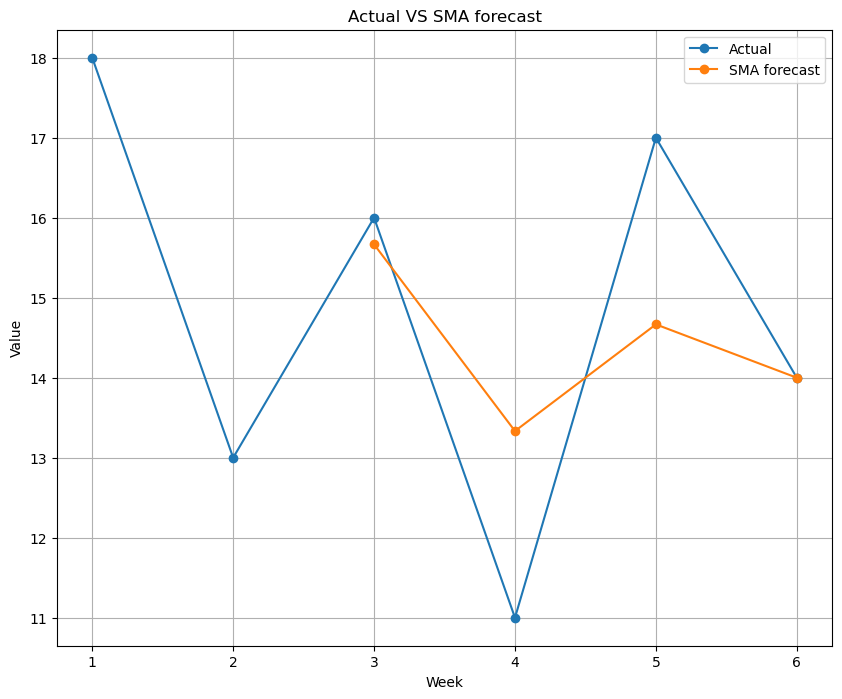

In [16]:
plt.figure(figsize=(10,8))
plt.plot(dataa.index, valuess, marker='o', label='Actual')
plt.plot(dataa.index, dataa['SMA_3'], marker='o', label='SMA forecast')
plt.title("Actual VS SMA forecast")
plt.xlabel("Week")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

In [28]:
data_clean = dataa.dropna()
mse_moving = mean_squared_error(data_clean['value'], data_clean['SMA_3'])
mse_moving

2.7500000000000018

In [18]:
data_clean = dataa.dropna()
mae = mean_absolute_error(data_clean['value'], data_clean['SMA_3'])
mae

1.2500000000000004

In [20]:
data_clean = dataa.dropna()
mse = mean_absolute_percentage_error(data_clean['value'], data_clean['SMA_3'])
mse*100

9.255236185383248

In [25]:
weights = np.array([0.2, 0.3, 0.5])

dataa['WMA'] = valuess.rolling(3).apply(
    lambda x: np.dot(x, weights),
    raw = True
)

WMA_for_week_7 = np.dot(valuess.iloc[-3:], weights)
WMA_for_week_7

14.3

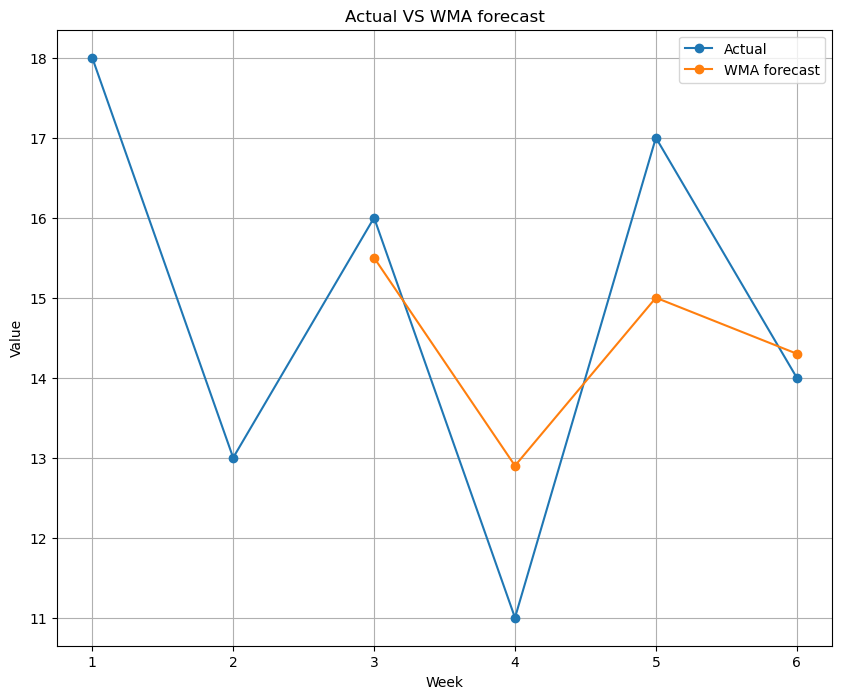

In [24]:
plt.figure(figsize=(10,8))
plt.plot(dataa.index, valuess, marker='o', label='Actual')
plt.plot(dataa.index, dataa['WMA'], marker='o', label='WMA forecast')
plt.title("Actual VS WMA forecast")
plt.xlabel("Week")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

In [27]:
data_clean = dataa.dropna()
mse_wma = mean_squared_error(data_clean['value'], data_clean['WMA'])
mse_wma

1.9875000000000005

In [29]:
data_clean = dataa.dropna()
mae_wma = mean_absolute_error(data_clean['value'], data_clean['WMA'])
mae_wma

1.1750000000000003

In [31]:
data_clean = dataa.dropna()
mape_wma = mean_absolute_percentage_error(data_clean['value'], data_clean['WMA'])
mape_wma*100

8.57632257448434

In [34]:
model = SimpleExpSmoothing(valuess).fit(smoothing_level=0.3, optimized = False)
dataa['SES'] = model.fittedvalues
SES_for_week_7 = model.forecast(1)
SES_for_week_7.iloc[0]

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


14.995049999999996

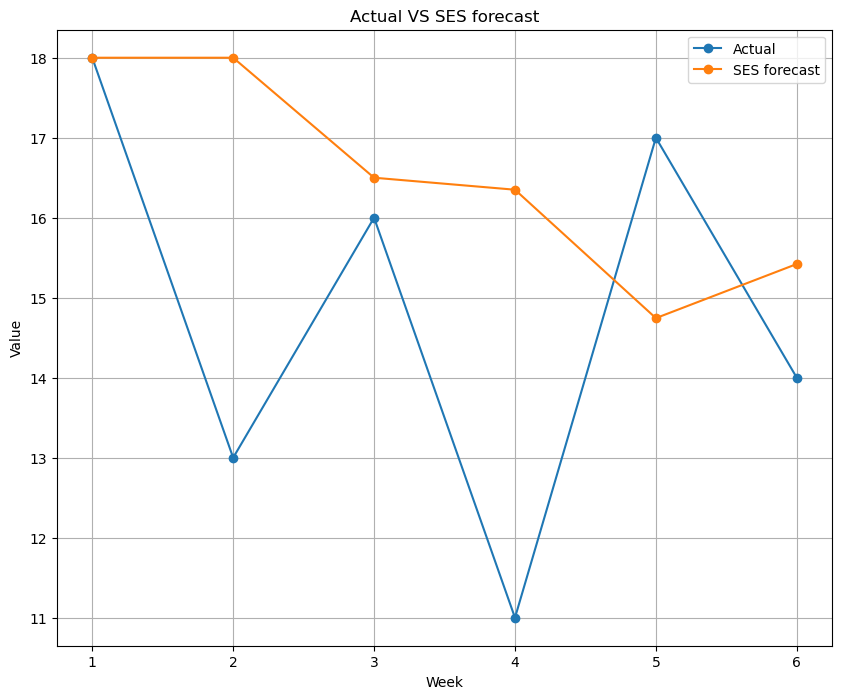

In [35]:
plt.figure(figsize=(10,8))
plt.plot(dataa.index, valuess, marker='o', label='Actual')
plt.plot(dataa.index, dataa['SES'], marker='o', label='SES forecast')
plt.title("Actual VS SES forecast")
plt.xlabel("Week")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

In [36]:
data_clean = dataa.dropna()
mse_ses = mean_squared_error(data_clean['value'], data_clean['SES'])
mse_ses

8.994546812499994

In [38]:
data_clean = dataa.dropna()
mae_ses = mean_absolute_error(data_clean['value'], data_clean['SES'])
mae_ses

2.381624999999999

In [39]:
data_clean = dataa.dropna()
mape_ses = mean_absolute_percentage_error(data_clean['value'], data_clean['SES'])
mape_ses * 100

18.794910236821995

In [40]:
print(dataa)

      value  naive      SMA_3   WMA      SES
week                                        
1        18    NaN        NaN   NaN  18.0000
2        13   18.0        NaN   NaN  18.0000
3        16   13.0  15.666667  15.5  16.5000
4        11   16.0  13.333333  12.9  16.3500
5        17   11.0  14.666667  15.0  14.7450
6        14   17.0  14.000000  14.3  15.4215
